In [81]:
from sklearn.datasets import load_digits
import numpy as np
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import matplotlib.pyplot as plt

In [2]:
(pixels, targets) = load_digits(return_X_y=True)

In [3]:
def neural_network_model(input_size, lr):
    network = input_data(shape=[None, input_size], name='state')
    
    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)
    
    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)
    
    network = fully_connected(network, 512, activation='relu')
    network = dropout(network, 0.8)
    
    network = fully_connected(network, 256, activation='relu')
    network = dropout(network, 0.8)
    
    network = fully_connected(network, 128, activation='relu')
    network = dropout(network, 0.8)
    
    network = fully_connected(network, 10, activation='softmax')
    network = regression(network, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='iris')
    
    model = tflearn.DNN(network, tensorboard_dir='log')
    
    return model
    

In [4]:
def format_y(target):
    label = np.zeros(10)
    label[target] = 1
    return label

In [5]:
x_train = pixels
y_train = list(map(format_y, targets))

In [6]:
model = neural_network_model(64, 0.00001)
model.fit(x_train, y_train, n_epoch=500, snapshot_step=5, show_metric=True, run_id='flower')

Training Step: 14499  | total loss: 0.44117 | time: 0.421s
| Adam | epoch: 500 | loss: 0.44117 - acc: 0.9357 -- iter: 1792/1797
Training Step: 14500  | total loss: 0.40650 | time: 0.445s
| Adam | epoch: 500 | loss: 0.40650 - acc: 0.9390 -- iter: 1797/1797
--


In [7]:
#predictions = model.predict(x_train[:10])


<Figure size 432x288 with 0 Axes>

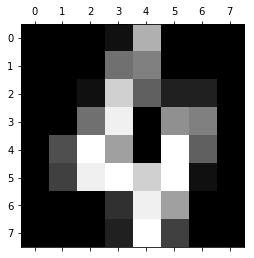

array([[1.3815871e-10, 9.9638224e-01, 8.0302656e-05, 3.9322208e-09,
        4.0350668e-04, 3.6988234e-07, 1.3869788e-04, 6.4033816e-06,
        2.9884395e-03, 2.9601352e-08]], dtype=float32)

In [89]:
i = 4

predictions = list(map(lambda x: x.argmax(), predictions))
def humanize_predictions(predictions):
    humanized_predictions = []
    for prediction in predictions:
        humanized_predictions.append(prediction.argmax())
    return humanized_predictions
humanize_predictions(predictions)

plt.gray()
plt.matshow(x_train[i].reshape(8,8))
plt.show()
list(map(format_y,/model.predict([x_train[1]])))
